# Generative Models PHW1

Name:

Student ID:

In [1]:
# Import necessary libraries
import networkx as nx
from matplotlib import pyplot as plt
import numpy as np
from collections import defaultdict
import scipy.io as sio

# Markov Random Field (10 points)

Consider a 2D image made of binary pixels. Now, suppose you have a noisy version of this image where each pixel has a 0.1 probability of flipping its value. In the figure below, a sample real and noisy image is displayed. In this problem, the goal is to recover the original image by observing the noisy image using a Markov random field.
The energy function of the network on this set of variables is defined as follows:
$$E=\alpha \sum_i  x_i  -\beta \sum_{i,j}x_{i}x_{j} -\gamma \sum_i x_i y_i$$

where the parameters need to be tuned. Based on the image provided in the file `HW1_image.mat`, you must find the real value of each pixel based on its noisy counterpart shown in the file.
To do this, find the optimal value for the above energy function. First, initialize the real pixel values (i.e., $x_i$) with their noisy values given in the file. Then, sequentially check if assigning the value +1 or -1 to each pixel decreases the energy function. Repeat this process until the energy function converges.
- Display the recovered image and report the numeric value of your accuracy.
- Discuss the effect of increasing or decreasing each of the three model parameters and for one of the parameters, demonstrate this effect by changing it and recovering the image again.
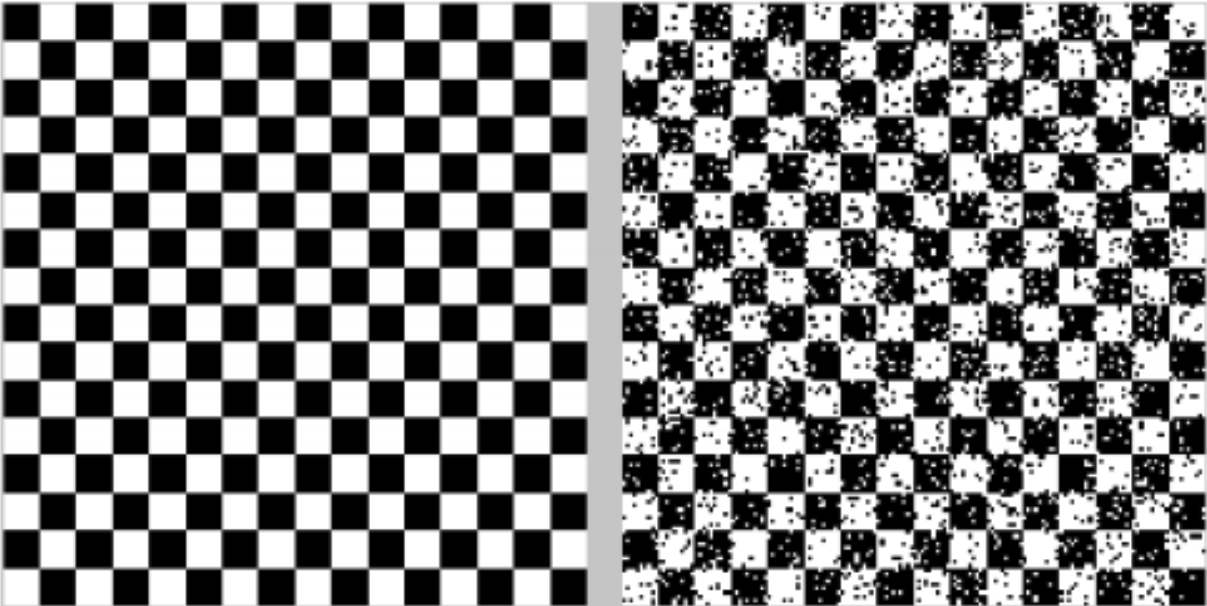

In [ ]:
class MarkovRandomFieldDenoising:
    def __init__(self, image_file):
        self.load_data(image_file)
        self.initialize_parameters()

    def load_data(self, image_file):
        # TODO: Load the noisy image data from the provided file
        data = sio.loadmat(image_file)
        self.noisy_image = data['noisy_image']
        self.true_image = data['original_image']

    def initialize_parameters(self):
        # TODO: Initialize the parameters for the Markov random field

    def energy_function(self, image):
        # TODO: Implement the energy function
        energy = 0
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                # Add energy computation based on neighbors
                pass
        return energy

    def denoise_image(self):
        # TODO: Implement the denoising algorithm
        denoised_image = self.noisy_image.copy()
        converged = False
        while not converged:
            converged = True
            for i in range(denoised_image.shape[0]):
                for j in range(denoised_image.shape[1]):
                    # Check if flipping the pixel reduces the energy
                    pass
        return denoised_image

    def compute_accuracy(self, denoised_image):
        # TODO: Compute the accuracy of the denoised image
        accuracy = np.mean(denoised_image == self.true_image)
        return accuracy

    def plot_images(self, denoised_image):
        # TODO: Plot the noisy, true, and denoised images
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 3, 1)
        plt.title('Noisy Image')
        plt.imshow(self.noisy_image, cmap='gray')
        plt.subplot(1, 3, 2)
        plt.title('True Image')
        plt.imshow(self.true_image, cmap='gray')
        plt.subplot(1, 3, 3)
        plt.title('Denoised Image')
        plt.imshow(denoised_image, cmap='gray')
        plt.show()


In [ ]:
# Initialize the Markov Random Field Denoising with the image file
mrf_denoising = MarkovRandomFieldDenoising('HW1_image.mat')

# Denoise the image
denoised_image = mrf_denoising.denoise_image()

# Compute the accuracy
accuracy = mrf_denoising.compute_accuracy(denoised_image)
print(f"Accuracy: {accuracy}")

# Plot the images
mrf_denoising.plot_images(denoised_image)

# TODO: Discuss the effect of parameter changes and demonstrate with one parameter

# Bayesian Network (15 points)

Here we want to implement a Bayesian Network from scratch. The instructions are as follows:

1. `__init__` method:
  - Create a directed acyclic graph (DAG) using `networkx.DiGraph()`.
  - Set up an empty dictionary cpts to store the Conditional Probability Tables (CPTs) for each node.

2. `add_node` method:
	- Use `self.graph.add_node(node)` to add a node to the network graph.

3. `add_edge` method:
  - Use `self.graph.add_edge(parent, child)` to create a directed edge from the parent to the child node.

4. `set_cpt` method:
  - Assign the cpt (which is a dictionary) to the node in `self.cpts[node]`.

5. `draw_network` method:
	-	Use `nx.spring_layout(self.graph)` to arrange the nodes.
	-	Use `nx.draw()` to plot the nodes and edges with labels, and customize the layout.
	-	Display the network using `plt.show()`.

6. `joint_probability` method:
	-	For each node, get its value from `values[node]` and its parents using `self.graph.predecessors(node)`.
	-	If a node has no parents (a root node), multiply the probability from the node's CPT.
	-	If a node has parents, get the parent values, and multiply the conditional probability from its CPT.

7. `compute_posterior` method:
	-	Identify hidden nodes (those not in the query or evidence).
	-	Compute the denominator by summing the joint probability over all possible values of hidden nodes.
	-	Compute the numerator by summing the joint probability of the query and evidence over all hidden values.
	-	Return the ratio of numerator to denominator.

8. `variable_elimination` method:
	-	Initialize factors using `_initialize_factors()`, reducing the CPTs based on evidence.
	-	Identify the nodes to eliminate (all nodes except the query and evidence).
	-	Eliminate each variable by summing it out with `_sum_out()`.
	-	Multiply the remaining factors and normalize to get the final distribution.

9. `_initialize_factors` method:
	-	For each node, get its CPT from `self.cpts`.
	-	If the node has evidence, reduce the CPT using `_reduce_factor()`.
	-	Otherwise, include the CPT unchanged.

10. `_reduce_factor` method:
  - If the node has no parents, just return the CPT for the observed value.
	- If the node has parents, keep only the relevant rows from the CPT based on the observed value.

11. `_sum_out` method:
	-	Find factors that include the variable.
	-	Multiply those factors together.
	-	Use `_sum_out_factor()` to sum out the variable from the combined factor.

12. `_sum_out_factor` method:
	-	For each assignment of the variable, sum over the values where the variable appears.
	-	Create a new factor that does not include the variable.

13. `_multiply_factors` method:
	-	Start with the first factor.
	-	Multiply it with the next factor using `_multiply_two_factors()`, and continue multiplying the remaining factors.

14. `_multiply_two_factors` method:
	-	Combine each pair of assignments from both factors.
	-	Multiply the corresponding probabilities, and return the new combined factor.

15. `_normalize` method:
	-	Compute the sum of all values in the factor.
	-	Divide each value by the total to ensure the probabilities sum to 1.

In [31]:
class BayesianNetwork:
    def __init__(self):
        """Initialize the Bayesian network as a directed acyclic graph (DAG)"""
        self.graph = nx.DiGraph()
        self.cpts = {}  # Conditional Probability Tables (CPTs)

    def add_node(self, node):
        """Add a node to the network"""
        # TODO: Add node to the graph

    def add_edge(self, parent, child):
        """Add a directed edge from parent to child"""
        # TODO: Add directed edge between nodes

    def set_cpt(self, node, cpt):
        """Set the conditional probability table for a node"""
        # TODO: Assign CPT to the node

    def draw_network(self):
        """Draw the Bayesian network using networkx"""
        plt.figure(figsize=(8, 6))
        pos = nx.spring_layout(self.graph)
        nx.draw(self.graph, pos, with_labels=True, node_size=5000, node_color='lightblue', font_size=12, font_weight='bold')
        plt.title("Bayesian Network Structure")
        plt.show()

    def joint_probability(self, values):
        """Compute the joint probability P(values) for a set of node values."""
        # TODO: Implement joint probability computation
        prob = 1.0

        return prob

    def compute_posterior(self, query, evidence):
        """Compute the posterior probability P(query | evidence)."""
        # TODO: Compute posterior probability given query and evidence
        pass

    def variable_elimination(self, query, evidence):
        """Perform exact inference using variable elimination."""
        # TODO: Implement variable elimination method
        pass

    def _initialize_factors(self, evidence):
        """Initialize factors, incorporating evidence."""
        # TODO: Initialize factors by reducing CPTs based on evidence
        factors = []

        return factors

    def _reduce_factor(self, cpt, node, value, parents):
        """Reduce the factor (CPT) based on evidence."""
        # TODO: Reduce CPT based on evidence
        pass

    def _sum_out(self, var, factors):
        """Sum out the variable from the list of factors."""
        # TODO: Sum out variable from factors
        pass

    def _sum_out_factor(self, factor, var):
        """Sum out a variable from a factor."""
        # TODO: Implement sum-out operation for factors
        pass

    def _multiply_factors(self, factors):
        """Multiply a list of factors."""
        # TODO: Multiply a list of factors
        pass

    def _multiply_two_factors(self, factor1, factor2):
        """Multiply two factors."""
        # TODO: Multiply two factors
        pass


    def _normalize(self, factor):
        """Normalize a factor to get a probability distribution."""
        # TODO: Normalize the factor
        pass

## Example
Here you must implement the following network using the `BayesianNetwork()` class you wrote:

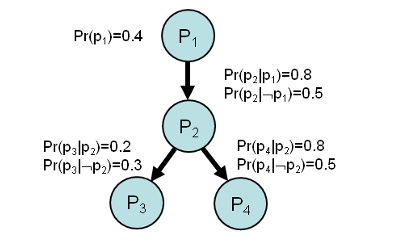

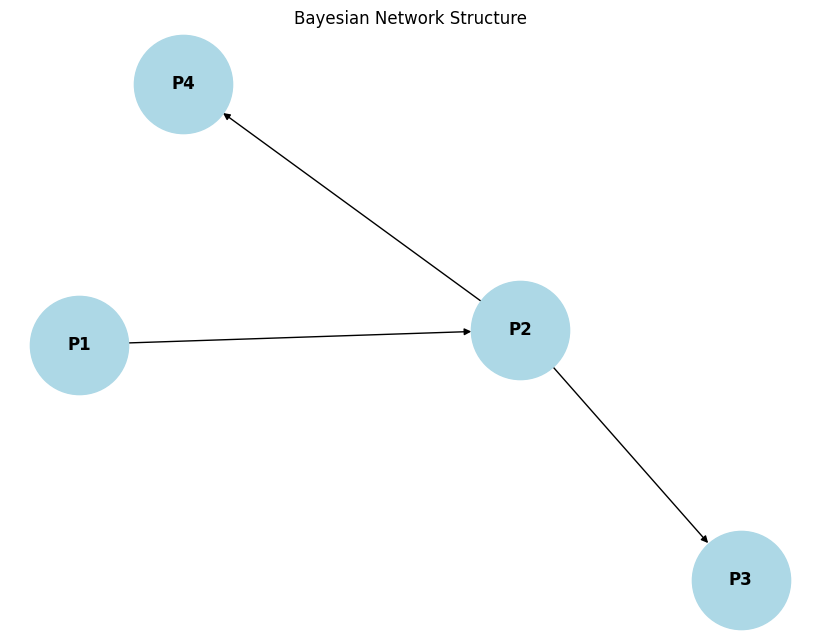

In [25]:
# TODO: Create a generic Bayesian network

# TODO: Add nodes

# TODO: Add edges

# TODO: Visualize the network structure
bn.draw_network()

Now fill in the Conditional Probability Tables (CPTs).

In [26]:
# TODO: Define the CPTs for each node

P1 = {
}

P2 = {
}

P3 = {
}

P4 = {
}

# Set the CPTs for each node in the network
bn.set_cpt('P1', P1)
bn.set_cpt('P2', P2)
bn.set_cpt('P3', P3)
bn.set_cpt('P4', P4)

### Question 1

Calculate $Pr(p_1 , p_2, \neg p_3, p_4)$ by using the `joing_probability(values)` method.

In [28]:
values = {'P1': 1, 'P2': 1, 'P3': 0, 'P4': 1}
jp = bn.joint_probability(values)
print(f"P{values} = {jp:.4f}")

P{'P1': 1, 'P3': 1, 'P2': 1, 'P4': 1} = 0.0512


### Question 2

Calculate $Pr(p_2, \neg p_3)$ by using the `compute_posterior(query, evidence)` method.

In [29]:
query = {'P2': 1, 'P3': 0}
evidence = {}
posterior = bn.compute_posterior(query, evidence)
print(f'P({query}) = {posterior:.3f}')

P({'P2': 1, 'P3': 0}) = 0.496


### Question 3
Calculate $Pr(p_1 | p_2, \neg p_3)$ by using the `compute_posterior(query, evidence)` method.

In [30]:
# Example: Compute the posterior for a query and evidence pair
query = {'P1': 1}
evidence = {'P2': 1, 'P3': 0}
posterior = bn.compute_posterior(query, evidence)
print(f'P({query} | {evidence}) = {posterior:.3f}')

P({'P1': 1} | {'P2': 1, 'P3': 0}) = 0.516


## Sampling

### Rejection Sampling

In [32]:
def rejection_sampling(bn, evidence, num_samples):
    """Rejection sampling for the given Bayesian network."""
    samples = {tuple(v): 0 for v in np.ndindex(*(2 for _ in bn.graph.nodes()))}  # Possible sample counts
    samples_count = 0

    # TODO

    print(f"Total Accepted Samples: {samples_count}")
    print(samples)

### Gibbs Sampling

In [33]:
def gibbs_sampling(bn, initial_sample, num_iterations):
    """Gibbs sampling for the Bayesian network."""
    sample = initial_sample.copy()
    samples = {tuple(v): 0 for v in np.ndindex(*(2 for _ in bn.graph.nodes()))}  # Initialize sample counts

    # TODO

    print(f"Samples after {num_iterations} iterations:")
    print(samples)